### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [48]:
# Fix typo
data = data.rename(columns={'passanger':'passenger'})

In [5]:
nulls = data.isna().sum()
nulls

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
data[['education','occupation','income','car','Bar']]

,education,occupation,income,car,Bar
0,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
2,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
3,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
4,Some college - no degree,Unemployed,$37500 - $49999,NaN,never
...,...,...,...,...,...
12679,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never
12680,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never
12681,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never
12682,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never


In [7]:
y = data['Y']
print(len(y))
print(y.sum())
print(len(y) - y.sum())

12684
7210
5474


3. Decide what to do about your missing data -- drop, replace, other...

The car data is almost completely missing, we can just drop the whole column

In [8]:
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [9]:
y = data['Y']
print(f'unique values: {y.unique()}')

unique values: [1 0]


In [10]:
accepted = y.sum()
print(f'accepted: {accepted}')
declined = len(y) - accepted
print(f'declined: {declined}')
accepted_proportion = accepted / len(y)
print(f'Proportion accepted: {accepted_proportion}')

accepted: 7210
declined: 5474
Proportion accepted: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

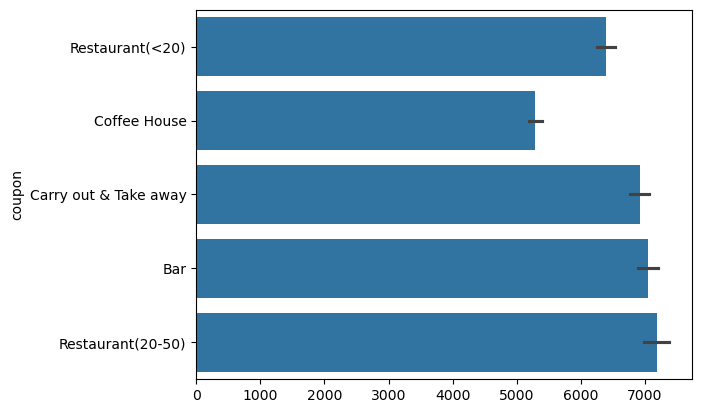

In [11]:
sns.barplot(data=data['coupon'])

6. Use a histogram to visualize the temperature column.

[55 80 30]


<Axes: xlabel='temperature', ylabel='Count'>

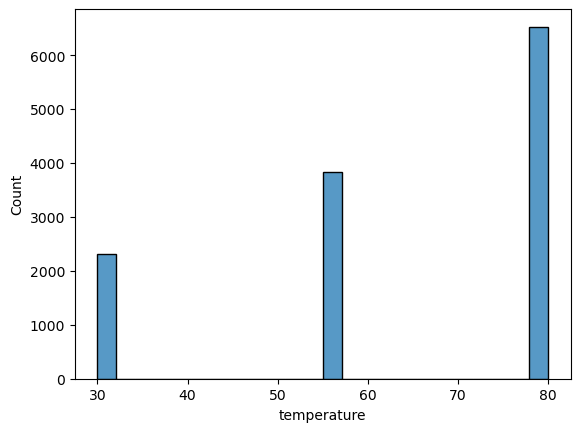

In [12]:
print(data['temperature'].unique())
sns.histplot(data=data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
print(f'Coupon types: {data['coupon'].unique()}')

Coupon types: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


2. What proportion of bar coupons were accepted?


In [14]:
bar_coupons = data.query('coupon == "Bar"')['Y']
print(f'Proportion of bar coupons accepted: {bar_coupons.sum() / len(bar_coupons)}')

Proportion of bar coupons accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
bar_coupons_data = data.query('coupon == "Bar"')

In [16]:
# Remove the 107 entries where we don't know how often they go to bars
bar_coupons_data_cleaned = bar_coupons_data[~(bar_coupons_data['Bar'].isna())]

In [17]:
print(f'Unique bar options: {bar_coupons_data_cleaned['Bar'].unique()}')

Unique bar options: ['never' 'less1' '1~3' 'gt8' '4~8']


In [18]:
three_or_less_options = ['never','less1','1~3']

In [19]:
bar_coupons_three_or_less = bar_coupons_data_cleaned.query('Bar in @three_or_less_options')

In [20]:
bar_coupons_more_than_three = bar_coupons_data_cleaned.query('Bar not in @three_or_less_options')

In [21]:
# Given a subset of the data, return the percentage of drivers in that subset who accepted the coupon
# Returns a string: a percentage rounded to two decimal places, followed by a percent sign.
def percentage(data_subset):
    proportion = data_subset['Y'].sum() / len(data_subset)
    return f'{round(proportion * 100, 2)}%'

In [22]:
print(f'Acceptance rate for infrequent bar visitors: {percentage(bar_coupons_three_or_less)}')
print(f'Acceptance rate for frequent bar visitors: {percentage(bar_coupons_more_than_three)}')

Acceptance rate for infrequent bar visitors: 37.06%
Acceptance rate for frequent bar visitors: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
print(f'Unique age values: {bar_coupons_data_cleaned['age'].unique()}')

Unique age values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [24]:
less_than_one_options = ['never','less1']

In [25]:
bar_coupons_1_or_more_over_25 = bar_coupons_data_cleaned.query('(Bar not in @less_than_one_options) and (age != "21")')
bar_coupons_1_or_more_over_25[['Bar','age']]

,Bar,age
112,1~3,26
123,1~3,26
127,1~3,26
156,gt8,26
167,gt8,26
...,...,...
12481,1~3,26
12482,1~3,26
12485,1~3,26
12488,1~3,26


In [26]:
print(f'Acceptance rate for drivers who visit a bar 1+ times a month and are over 25: {percentage(bar_coupons_1_or_more_over_25)}')

Acceptance rate for drivers who visit a bar 1+ times a month and are over 25: 68.84%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:
bar_coupons_data_cleaned['passenger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [28]:
adult_passengers = ['Friend(s)','Partner']

In [29]:
bar_coupons_data_cleaned['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [30]:
new_data_1 = bar_coupons_data_cleaned.query('(Bar not in @less_than_one_options) and (passenger in @adult_passengers) and ' +
                                           '(occupation != "Farming Fishing & Forestry")')
new_data_1[['Bar','passenger','occupation']]

,Bar,passenger,occupation
90,1~3,Friend(s),Student
112,1~3,Friend(s),Student
156,gt8,Friend(s),Healthcare Support
224,1~3,Partner,Management
227,1~3,Partner,Management
...,...,...,...
12481,1~3,Friend(s),Office & Administrative Support
12482,1~3,Friend(s),Office & Administrative Support
12488,1~3,Partner,Office & Administrative Support
12525,1~3,Friend(s),Food Preparation & Serving Related


In [31]:
print(f'Acceptance rate for drivers w/ bars >1/month, adult passengers, occupation not farming, fishing, or forestry: {
percentage(new_data_1)
}')

Acceptance rate for drivers w/ bars >1/month, adult passengers, occupation not farming, fishing, or forestry: 71.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [32]:
bar_coupons_data_cleaned['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [33]:
new_data_2 = bar_coupons_data_cleaned.query('(Bar not in @less_than_one_options) and (passenger in @adult_passengers) and ' +
                                            '(maritalStatus != "Widowed")')

In [34]:
print(f'Acceptance rate for drivers w/ bars >1/month, adult passengers, and not widowed: {
percentage(new_data_2)
}')

Acceptance rate for drivers w/ bars >1/month, adult passengers, and not widowed: 71.79%


In [35]:
print(f'Unique age values: {bar_coupons_data_cleaned['age'].unique()}')

Unique age values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [36]:
ages_under_30 = ['21','below21']

Question: Do any of those marked with 'below21' age go to bars?

In [37]:
print(f'Number of drivers less than 21 who say they go to bars: {len(bar_coupons_data_cleaned.query('(Bar != "never") and (age == "under21")'))}')

Number of drivers less than 21 who say they go to bars: 0


(Answer: no)

In [38]:
new_data_3 = bar_coupons_data_cleaned.query('(Bar not in @less_than_one_options) and (age in @ages_under_30)')

In [39]:
print(f'Acceptance rate for drivers who go to bars 1+ times a month and are under 30: {
percentage(new_data_3)
}')

Acceptance rate for drivers who go to bars 1+ times a month and are under 30: 67.05%


In [40]:
bars_and_cheap_restaurants_data_cleaned = data.dropna(subset=['Bar','RestaurantLessThan20'])
bars_and_cheap_restaurants_data_cleaned[['Bar','RestaurantLessThan20']]

,Bar,RestaurantLessThan20
0,never,4~8
1,never,4~8
2,never,4~8
3,never,4~8
4,never,4~8
...,...,...
12679,never,4~8
12680,never,4~8
12681,never,4~8
12682,never,4~8


In [41]:
bars_and_cheap_restaurants_data_cleaned['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [42]:
four_plus_times = ['4~8','gt8']

In [43]:
bars_and_cheap_restaurants_data_cleaned['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [44]:
income_less_than_50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

In [45]:
new_data_4 = bars_and_cheap_restaurants_data_cleaned.query('(RestaurantLessThan20 in @four_plus_times) and ' +
                                                           '(income in @income_less_than_50k)')

In [46]:
print(f'Acceptance rate for drivers who go to cheap restaurants 4+ times/month, and <$50k income: {
percentage(new_data_4)
}')

Acceptance rate for drivers who go to cheap restaurants 4+ times/month, and <$50k income: 60.26%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Unsurprisingly, the strongest predictor of accepting the bar coupons seems to be whether the driver frequently visits bars.
Frequent bar visitors accepted the bar coupon 77% of the time, while drivers who infrequently or never visit bars
accepted the bar coupon only 37% of the time.

Interestingly, relatively low income drivers who often visit cheap restaurants only accepted the coupon 60% of the time,
which is lower than I expected. If we split this group into frequent vs. infrequent bar visitors, the results are surprising:

In [47]:
new_data_5 = new_data_4.query('Bar in @three_or_less_options')
new_data_6 = new_data_4.query('Bar not in @three_or_less_options')
print(f'Acceptance rate for this group who are infrequent bar visitors: {percentage(new_data_5)}')
print(f'Acceptance rate for this group who are frequent bar visitors: {percentage(new_data_6)}')

Acceptance rate for this group who are infrequent bar visitors: 58.8%
Acceptance rate for this group who are frequent bar visitors: 65.94%


Among this group, frequent bar visitors accepted the bar coupon at a 66% rate, lower than the overall rate for frequent bar visitors (77%). This is a bit strange. However, infrequent bar visitors in this group accepted the bar coupon at a 59% rate, much higher than the 37% overall rate for infrequent bar visitors. This suggests that both low income and frequently visiting cheap restaurants make a driver more likely to accept a bar coupon.

The effect of marital status and occupation are unclear, but seem marginal at best.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  